<a href="https://colab.research.google.com/github/prat-man/CSE-575-Statistical-Machine-Learning/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM

In [2]:
import httpimport

with httpimport.remote_repo('https://raw.githubusercontent.com/prat-man/CSE-575-Statistical-Machine-Learning/main'):
    from data import get_data

In [3]:
seed = 0

In [4]:
X_train, X_val, X_test, y_train, y_val, y_test, labels = get_data('LSTM')

In [5]:
scaler = StandardScaler()

train_shape = X_train.shape
train_new_shape = X_train.shape[0] * X_train.shape[1], X_train.shape[2]
X_train = scaler.fit_transform(X_train.reshape(train_new_shape)).reshape(train_shape)

val_shape = X_val.shape
val_new_shape = X_val.shape[0] * X_val.shape[1], X_val.shape[2]
X_val = scaler.transform(X_val.reshape(val_new_shape)).reshape(val_shape)

test_shape = X_test.shape
test_new_shape = X_test.shape[0] * X_test.shape[1], X_test.shape[2]
X_test = scaler.transform(X_test.reshape(test_new_shape)).reshape(test_shape)

In [6]:
model_layers = [
    Input((X_train.shape[1], X_train.shape[2])),

    LSTM(64, return_sequences=False),

    Dense(64, activation='relu'),

    Dense(10, activation='softmax')
]

model = Sequential(model_layers)

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                31232     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 36,042
Trainable params: 36,042
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64)

Epoch 1/50
10/10 [==============================] - 9s 90ms/step - loss: 2.2219 - accuracy: 0.2033 - val_loss: 2.0656 - val_accuracy: 0.3650
Epoch 2/50
10/10 [==============================] - 0s 10ms/step - loss: 1.9356 - accuracy: 0.4200 - val_loss: 1.8469 - val_accuracy: 0.4300
Epoch 3/50
10/10 [==============================] - 0s 11ms/step - loss: 1.7131 - accuracy: 0.4833 - val_loss: 1.6589 - val_accuracy: 0.4500
Epoch 4/50
10/10 [==============================] - 0s 8ms/step - loss: 1.5219 - accuracy: 0.5183 - val_loss: 1.4937 - val_accuracy: 0.5300
Epoch 5/50
10/10 [==============================] - 0s 9ms/step - loss: 1.3432 - accuracy: 0.5950 - val_loss: 1.3522 - val_accuracy: 0.5500
Epoch 6/50
10/10 [==============================] - 0s 11ms/step - loss: 1.1828 - accuracy: 0.6517 - val_loss: 1.2354 - val_accuracy: 0.5850
Epoch 7/50
10/10 [==============================] - 0s 9ms/step - loss: 1.0358 - accuracy: 0.7083 - val_loss: 1.1293 - val_accuracy: 0.6150
Epoch 8/50
10/10

In [10]:
_, accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {accuracy}')

19/19 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000
Training Accuracy: 1.0


In [11]:
y_pred = model.predict(X_test)

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

7/7 [==============================] - 0s 3ms/step


In [12]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.60      0.69        20
           1       0.95      0.90      0.92        20
           2       0.79      0.75      0.77        20
           3       0.65      0.65      0.65        20
           4       0.55      0.55      0.55        20
           5       0.83      0.95      0.88        20
           6       0.85      0.85      0.85        20
           7       0.76      0.80      0.78        20
           8       0.67      0.60      0.63        20
           9       0.64      0.80      0.71        20

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



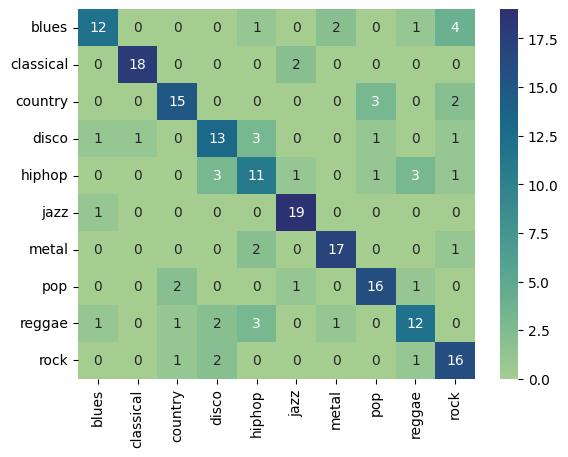

In [13]:
conf_m = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_m, cmap='crest', annot=True)

plt.xticks(ticks = np.arange(0.5, 10, 1), labels=labels, rotation=90)
plt.yticks(ticks = np.arange(0.5, 10, 1), labels=labels,rotation=0)

plt.savefig('LSTM_Confusion_Matrix.png', dpi=300)

In [14]:
accuracy = np.trace(conf_m) / np.sum(conf_m)
print(f'Overall test accuracy = {accuracy}')

Overall test accuracy = 0.745


In [15]:
accuracy_df = pd.DataFrame(columns=['accuracy'])

class_acc = conf_m.diagonal() / conf_m.sum(axis=1)
for i in range(len(labels)):
    accuracy_df.loc[labels[i]] = [round(class_acc[i], 2)]

accuracy_df

,accuracy
blues,0.60
classical,0.90
country,0.75
disco,0.65
hiphop,0.55
jazz,0.95
metal,0.85
pop,0.80
reggae,0.60
rock,0.80


In [16]:
model.save('LSTM.h5')